Muhammad Zacky Asy'ari <br>
https://www.linkedin.com/in/muhammad-zacky-asyari/


Dataset is from:<br>
https://catalog.data.gov/dataset/wind-turbine-gearbox-condition-monitoring-vibration-analysis-benchmarking-datasets <br>
You may change the directory location depends on your computer

Publication: <br>
https://ieeexplore.ieee.org/abstract/document/10935342/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from numpy.random import uniform
# to measure exec time
from timeit import default_timer as timer    

# Check dataset keys

In [12]:
from scipy.io import loadmat

health_path = 'D:/Documents/School/PhD/UI/PhD Research/Code and Dataset/Public dataset/Wind Turbine US Departement of Energy/Healthy/H5.mat'
mat = loadmat(health_path)
print("Keys for healty data: ", mat.keys()) #to see what key for data was called

damage_path = 'D:/Documents/School/PhD/UI/PhD Research/Code and Dataset/Public dataset/Wind Turbine US Departement of Energy/Damaged/D5.mat'
mat = loadmat(damage_path)
print("Keys for damage data: ",mat.keys()) #to see what key for data was called

Keys for healty data:  dict_keys(['__header__', '__version__', '__globals__', 'AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10', 'Speed'])
Keys for damage data:  dict_keys(['__header__', '__version__', '__globals__', 'Speed', 'Torque', 'AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10'])


# Generate dataframe

In [13]:
import pandas as pd

def mat_to_dataframe(data_path='Damaged/D1.mat',col=None, data_start=None, data_end=None):
    '''This code to convert matlab .mat data to pandas dataframe 
    data_path: path to file location 
    col      : key dictionary/column name at original file (put keys in list)
    data size: amount of row to be generated on the dataframe'''
    mat = loadmat(data_path)
    values = []
    for i in range(len(col)):
        values.append(mat[col[i]][data_start:data_end].flatten()) 
    d = dict(zip(col, values))
    df = pd.DataFrame.from_dict(d)
    return df

# Generate data frame for healty and damage dataset
keys_healthy = ['AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10']
keys_damage = ['AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10']

health_path= 'Healthy/H1.mat'
damage_path = 'Damaged/D1.mat'

data_start = 2000000
data_end = 2002500
healthy = mat_to_dataframe(data_path=health_path,col=keys_healthy, data_start=data_start, data_end=data_end)
damage = mat_to_dataframe(data_path=damage_path,col=keys_damage, data_start=data_start, data_end=data_end)

In [14]:
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
counts = damage["AN10"].to_numpy()
times = np.array(np.arange(0, len(damage["AN10"])))

c:\Users\Omen\anaconda3\envs\PhD_Simulation\Lib\site-packages\stingray\lightcurve.py:338: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


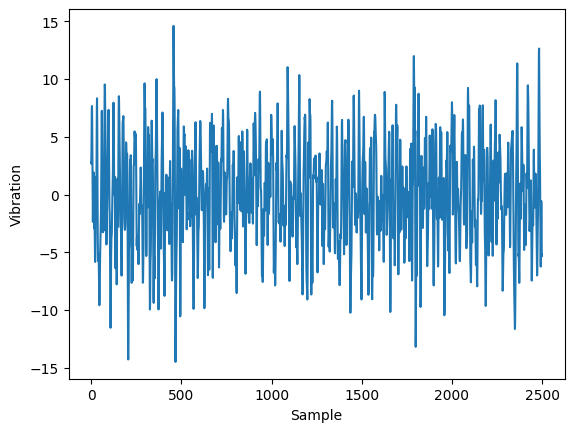

In [16]:
lc = lightcurve.Lightcurve(times,counts)
lc.plot(labels=['Sample','Vibration'])


In [17]:
bs = Bispectrum(lc)

# Raw data from computation

self.freq - Frequencies against which Bispectrum is calculated. <br>
self.lags - Time lags in lightcurve against which 3rd order cumulant is calculated.<br>
self.cum3 - 3rd Order cumulant function <br>
self.bispec_mag - Magnitude of Bispectrum <br>
self.bispecphase - Phase of Bispectrum 

In [18]:
x = bs.lags

# Data Visualization

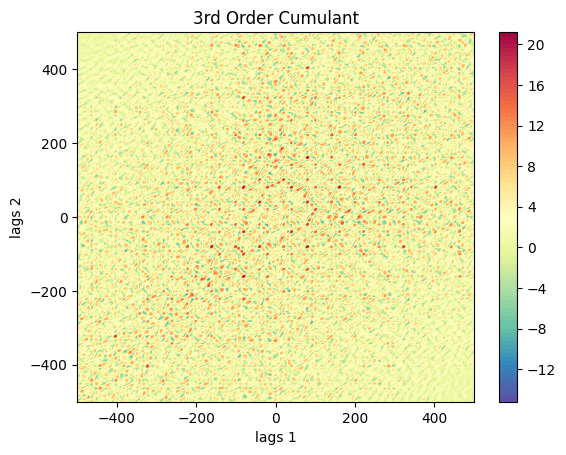

In [20]:
p = bs.plot_cum3()
p.show()

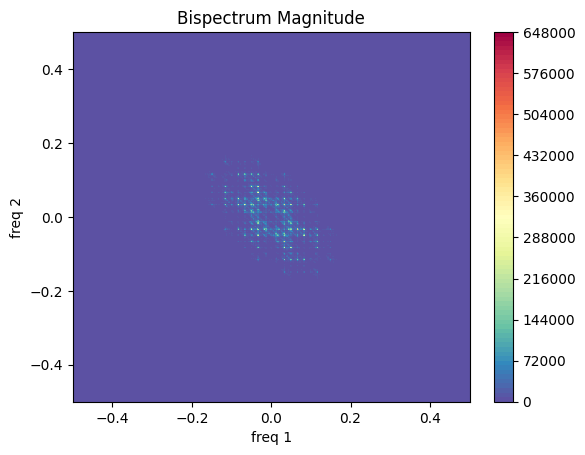

In [21]:
p = bs.plot_mag()
p.show()

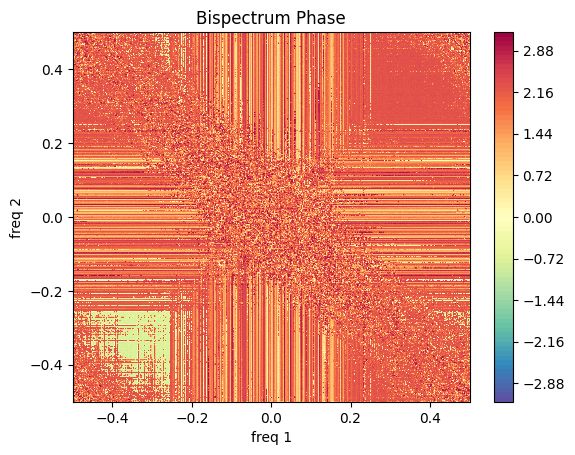

In [22]:
p = bs.plot_phase()
p.show()

# Using normalize signal

In [20]:
from sklearn import preprocessing as pre
AN10_array = counts.reshape(-1, 1)
AN10_array_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN10_array)

c:\Users\Omen\anaconda3\envs\PhD_Simulation\Lib\site-packages\stingray\lightcurve.py:338: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


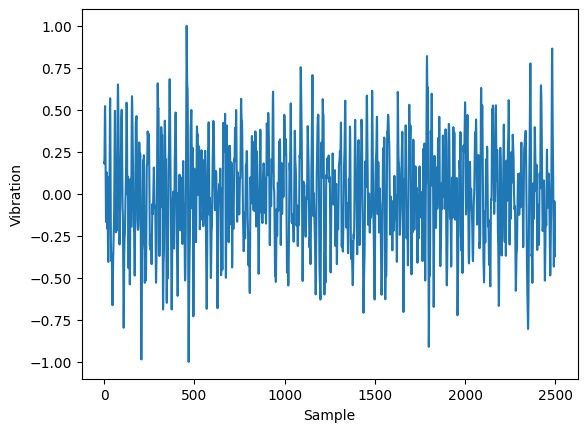

In [21]:
lc = lightcurve.Lightcurve(times,AN10_array_norm)
lc.plot(labels=['Sample','Vibration'])

In [11]:
bs = Bispectrum(lc)

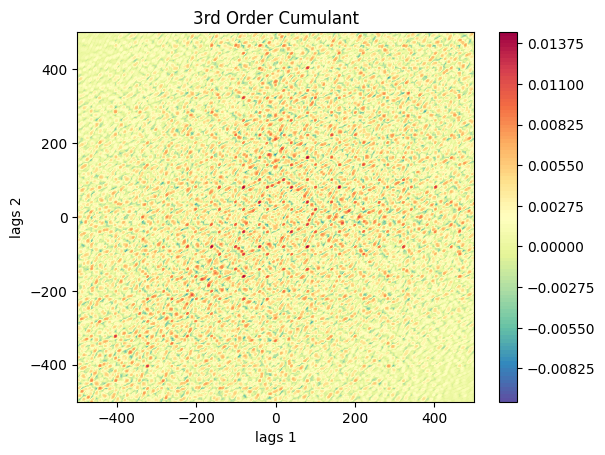

In [26]:
p = bs.plot_cum3()
p.show()

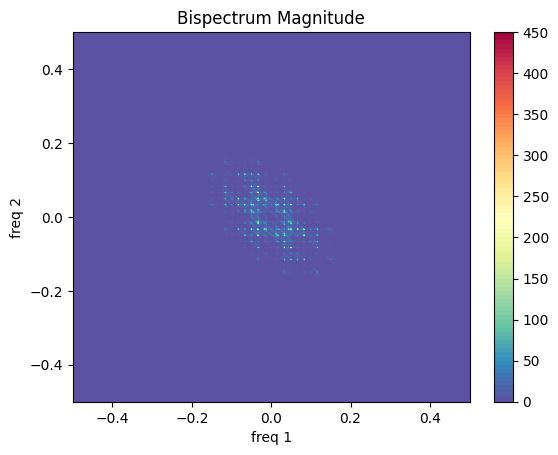

In [27]:
p = bs.plot_mag()
p.show()

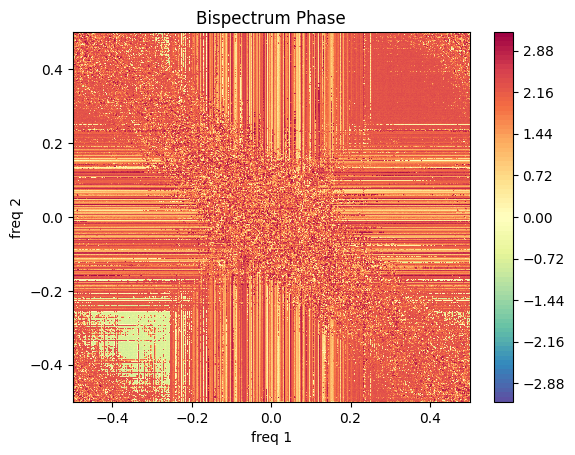

In [28]:
p = bs.plot_phase()
p.show()

# Analysing health, scuffing, overheating, fretting corrision

Generating variable:

In [22]:
# Variable can be used for all variable
times = np.array(np.arange(0, len(damage["AN3"])))

# health-damage
AN3_array_health = healthy["AN3"].to_numpy().reshape(-1, 1)
AN3_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN3_array_health)

AN3_array_dmg = damage["AN3"].to_numpy().reshape(-1, 1)
AN3_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN3_array_dmg)

# health-damage
AN4_array_health = healthy["AN4"].to_numpy().reshape(-1, 1)
AN4_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN4_array_health)

AN4_array_dmg = damage["AN4"].to_numpy().reshape(-1, 1)
AN4_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN4_array_dmg)

# health-damage
AN5_array_health = healthy["AN5"].to_numpy().reshape(-1, 1)
AN5_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN5_array_health)

AN5_array_dmg = damage["AN5"].to_numpy().reshape(-1, 1)
AN5_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN5_array_dmg)

# health-damage
AN6_array_health = healthy["AN6"].to_numpy().reshape(-1, 1)
AN6_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN6_array_health)

AN6_array_dmg = damage["AN6"].to_numpy().reshape(-1, 1)
AN6_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN6_array_dmg)

# health-damage
AN7_array_health = healthy["AN7"].to_numpy().reshape(-1, 1)
AN7_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN7_array_health)

AN7_array_dmg = damage["AN7"].to_numpy().reshape(-1, 1)
AN7_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN7_array_dmg)

# health-damage
AN8_array_health = healthy["AN8"].to_numpy().reshape(-1, 1)
AN8_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN8_array_health)

AN8_array_dmg = damage["AN8"].to_numpy().reshape(-1, 1)
AN8_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN8_array_dmg)

# health-damage
AN9_array_health = healthy["AN9"].to_numpy().reshape(-1, 1)
AN9_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN9_array_health)

AN9_array_dmg = damage["AN9"].to_numpy().reshape(-1, 1)
AN9_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN9_array_dmg)

# health-damage
AN10_array_health = healthy["AN10"].to_numpy().reshape(-1, 1)
AN10_array_health_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN10_array_health)

AN10_array_dmg = damage["AN10"].to_numpy().reshape(-1, 1)
AN10_array_dmg_norm = pre.MinMaxScaler(feature_range=(-1, 1)).fit_transform(AN10_array_dmg)


Variable for plot:

In [23]:
lc_AN3_health = lightcurve.Lightcurve(times,AN3_array_health_norm)
lc_AN3_dmg = lightcurve.Lightcurve(times,AN3_array_dmg_norm)

lc_AN4_health = lightcurve.Lightcurve(times,AN4_array_health_norm)
lc_AN4_dmg = lightcurve.Lightcurve(times,AN4_array_dmg_norm)

lc_AN5_health = lightcurve.Lightcurve(times,AN5_array_health_norm)
lc_AN5_dmg = lightcurve.Lightcurve(times,AN5_array_dmg_norm)

lc_AN6_health = lightcurve.Lightcurve(times,AN6_array_health_norm)
lc_AN6_dmg = lightcurve.Lightcurve(times,AN6_array_dmg_norm)

lc_AN7_health = lightcurve.Lightcurve(times,AN7_array_health_norm)
lc_AN7_dmg = lightcurve.Lightcurve(times,AN7_array_dmg_norm)

lc_AN8_health = lightcurve.Lightcurve(times,AN8_array_health_norm)
lc_AN8_dmg = lightcurve.Lightcurve(times,AN8_array_dmg_norm)

lc_AN9_health = lightcurve.Lightcurve(times,AN9_array_health_norm)
lc_AN9_dmg = lightcurve.Lightcurve(times,AN9_array_dmg_norm)

lc_AN10_health = lightcurve.Lightcurve(times,AN10_array_health_norm)
lc_AN10_dmg = lightcurve.Lightcurve(times,AN10_array_dmg_norm)

c:\Users\Omen\anaconda3\envs\PhD_Simulation\Lib\site-packages\stingray\lightcurve.py:338: UserWarning: On Windows, the size of an integer is 32 bits. To avoid integer overflow, I'm converting the input array to float
  warnings.warn(


In [24]:
bs_AN3_health = Bispectrum(lc_AN3_health)
bs_AN3_dmg = Bispectrum(lc_AN3_dmg)

bs_AN4_health = Bispectrum(lc_AN4_health)
bs_AN4_dmg = Bispectrum(lc_AN4_dmg)

bs_AN5_health = Bispectrum(lc_AN5_health)
bs_AN5_dmg = Bispectrum(lc_AN5_dmg)

bs_AN6_health = Bispectrum(lc_AN6_health)
bs_AN6_dmg = Bispectrum(lc_AN6_dmg)

bs_AN7_health = Bispectrum(lc_AN7_health)
bs_AN7_dmg = Bispectrum(lc_AN7_dmg)

bs_AN8_health = Bispectrum(lc_AN8_health)
bs_AN8_dmg = Bispectrum(lc_AN8_dmg)

bs_AN9_health = Bispectrum(lc_AN9_health)
bs_AN9_dmg = Bispectrum(lc_AN9_dmg)

bs_AN10_health = Bispectrum(lc_AN10_health)
bs_AN10_dmg = Bispectrum(lc_AN10_dmg)

3rd Order cumulant:

Health: 


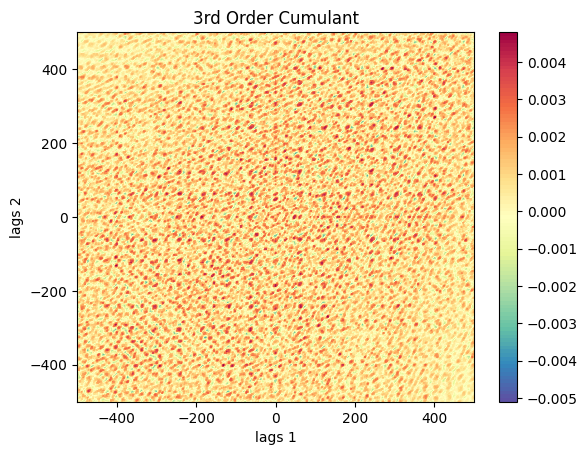

Scuffing: 


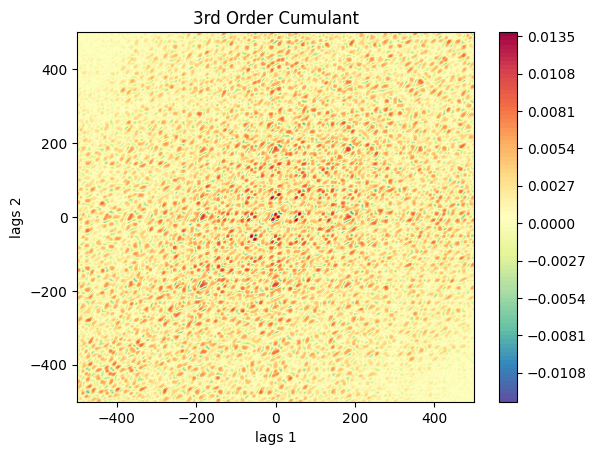

Overheating: 


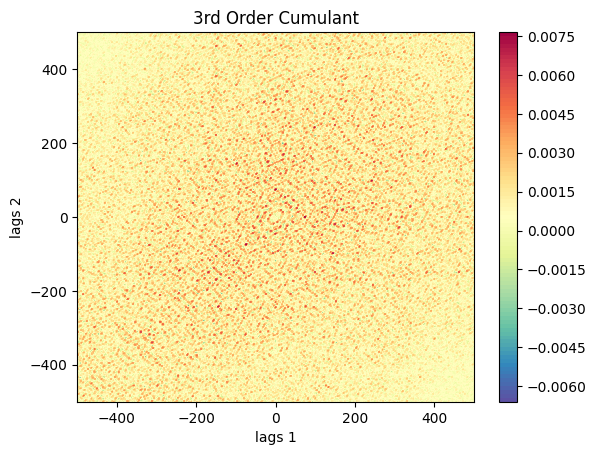

Fretting Corrision: 


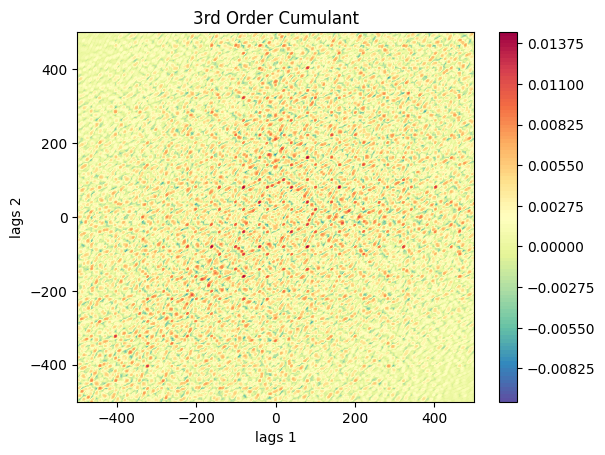

In [39]:
print("Health: ")
p_AN3_health = bs_AN3_health.plot_cum3()
p_AN3_health.show()

print("Scuffing: ")
p_AN3_dmg = bs_AN3_dmg.plot_cum3()
p_AN3_dmg.show()

print("Overheating: ")
p_AN9_dmg = bs_AN9_dmg.plot_cum3()
p_AN9_dmg.show()

print("Fretting Corrision: ")
p_AN10_dmg = bs_AN10_dmg.plot_cum3()
p_AN10_dmg.show()


Bispectrum Magnitude:

Health: 


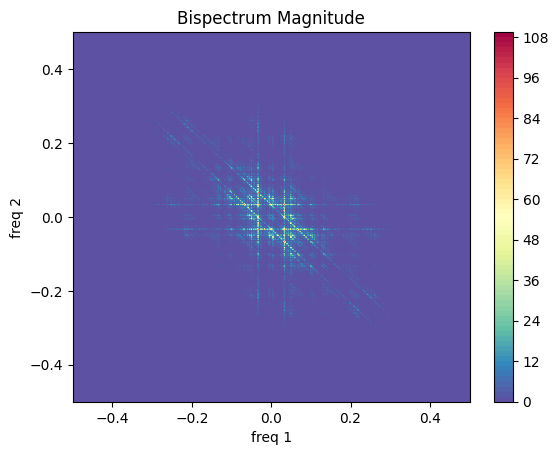

Scuffing: 


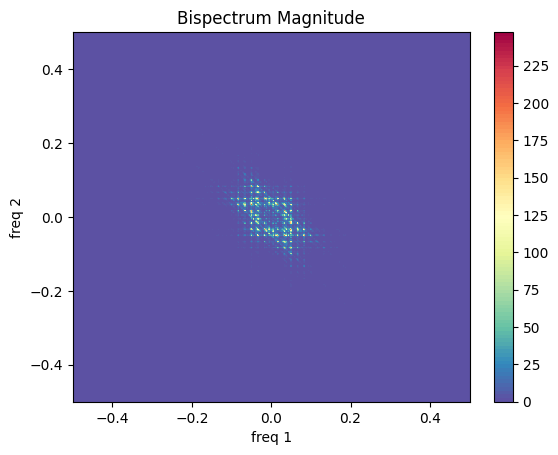

Overheating: 


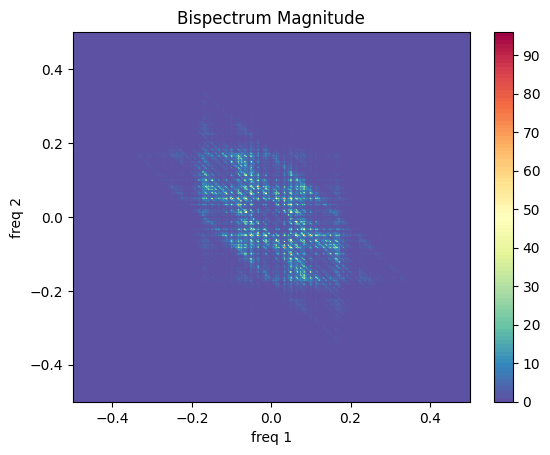

Fretting Corrision: 


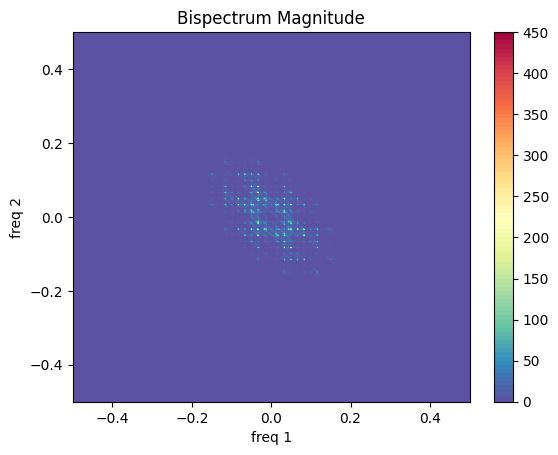

In [40]:
print("Health: ")
p_AN3_health = bs_AN3_health.plot_mag()
p_AN3_health.show()

print("Scuffing: ")
p_AN3_dmg = bs_AN3_dmg.plot_mag()
p_AN3_dmg.show()

print("Overheating: ")
p_AN9_dmg = bs_AN9_dmg.plot_mag()
p_AN9_dmg.show()

print("Fretting Corrision: ")
p_AN10_dmg = bs_AN10_dmg.plot_mag()
p_AN10_dmg.show()

Health vs damage on the same sensor

Health AN3: 


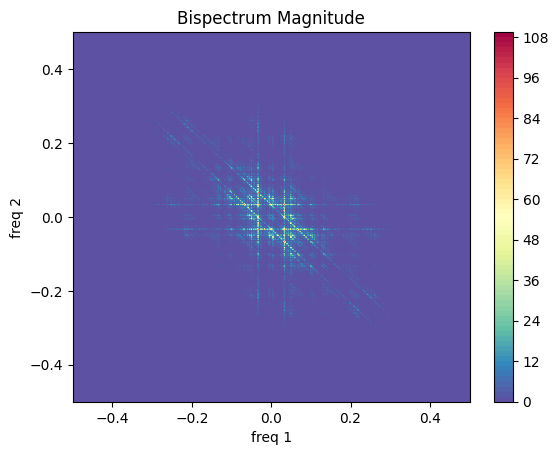

Scuffing AN3: 


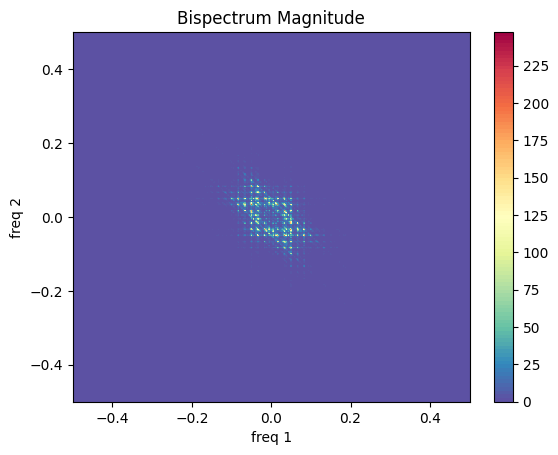

Health AN9: 


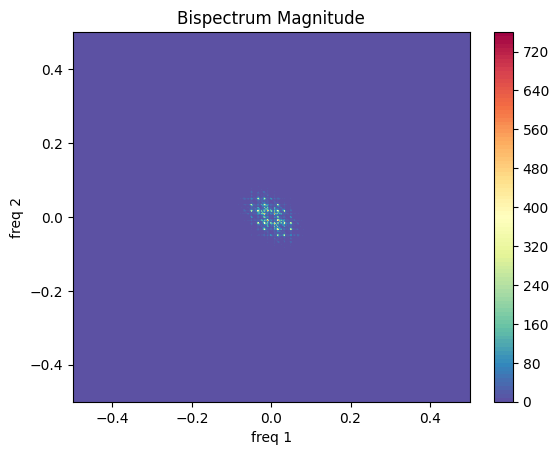

Overheating AN9: 


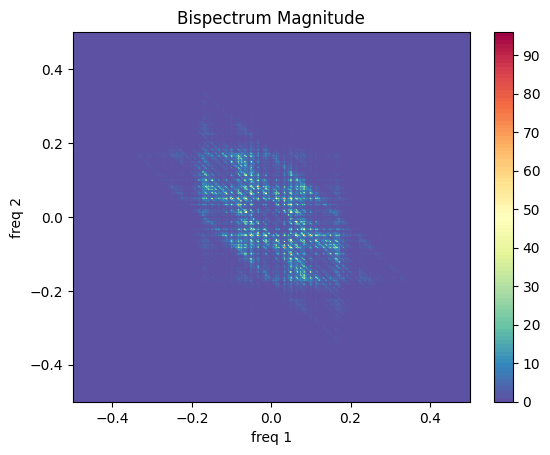

Health AN10: 


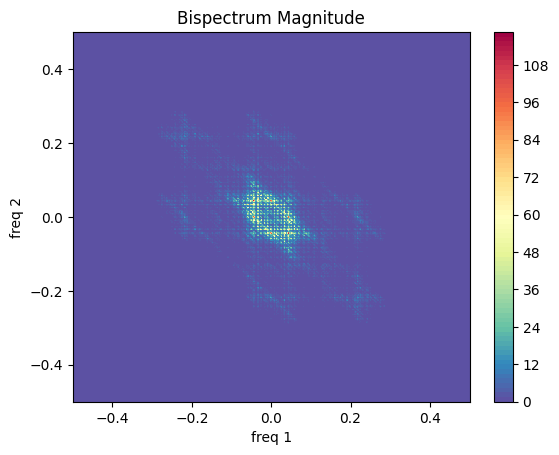

Fretting Corrision AN10: 


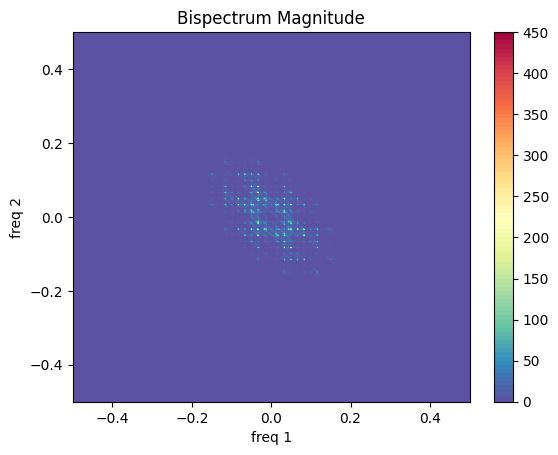

In [42]:
print("Health AN3: ")
p_AN3_health = bs_AN3_health.plot_mag()
p_AN3_health.show()

print("Scuffing AN3: ")
p_AN3_dmg = bs_AN3_dmg.plot_mag()
p_AN3_dmg.show()

print("Health AN9: ")
p_AN9_health = bs_AN9_health.plot_mag()
p_AN9_health.show()

print("Overheating AN9: ")
p_AN9_dmg = bs_AN9_dmg.plot_mag()
p_AN9_dmg.show()

print("Health AN10: ")
p_AN10_health = bs_AN10_health.plot_mag()
p_AN10_health.show()

print("Fretting Corrision AN10: ")
p_AN10_dmg = bs_AN10_dmg.plot_mag()
p_AN10_dmg.show()

Bispectrum Phase:

Health AN3: 


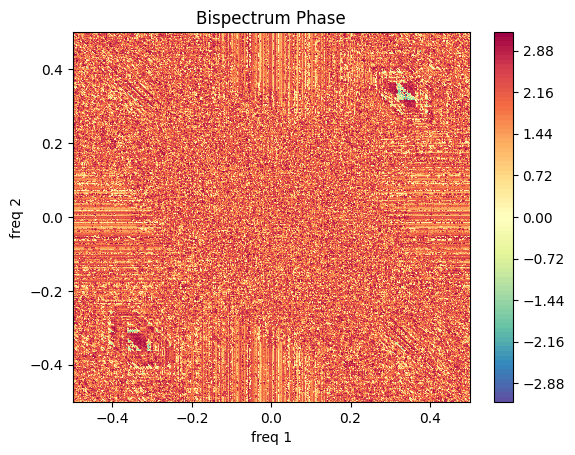

Scuffing AN3: 


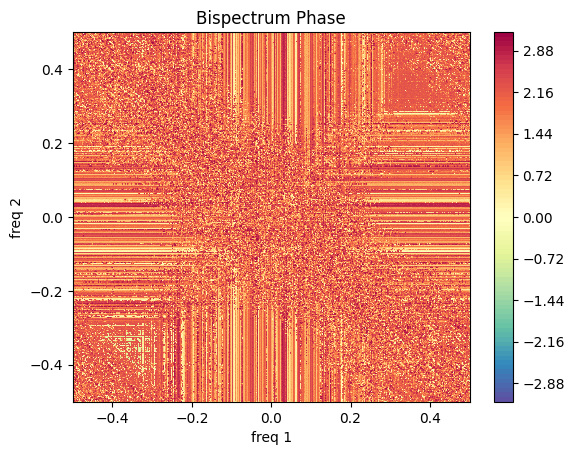

Health AN9: 


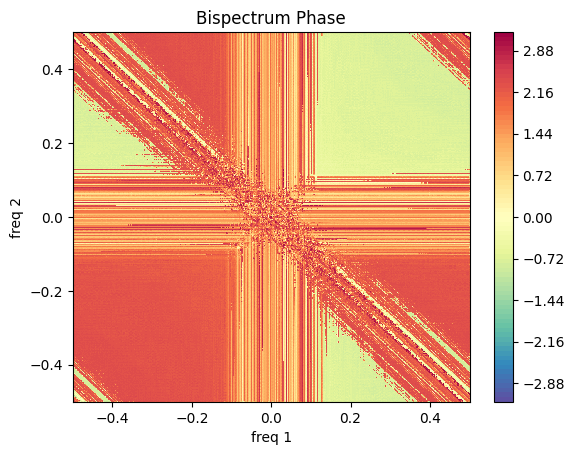

Overheating AN9: 


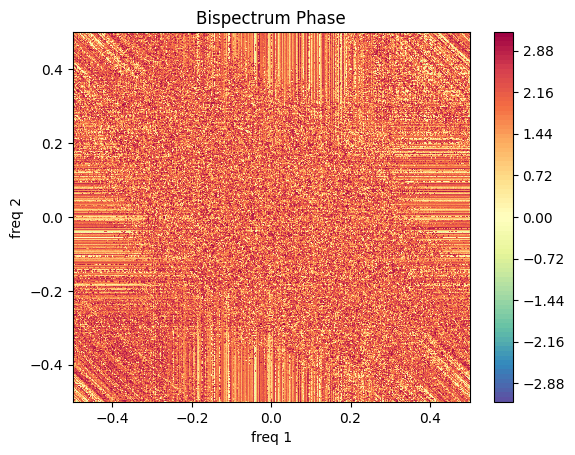

Health AN10: 


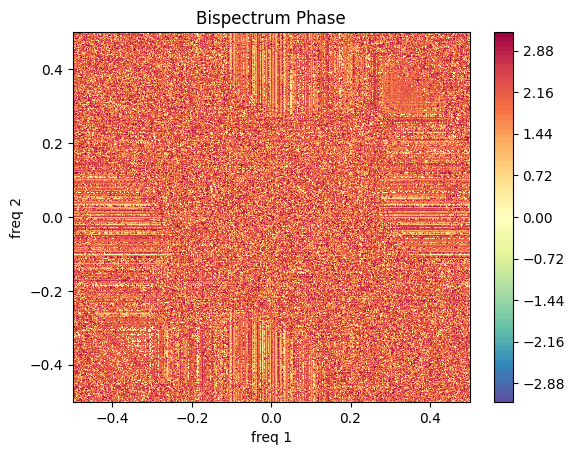

Fretting Corrision AN10: 


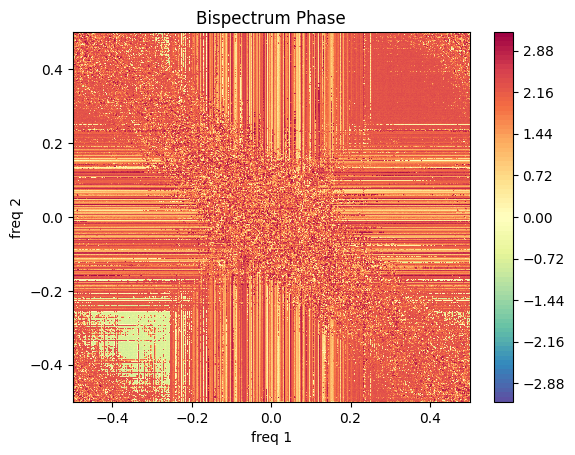

In [43]:
print("Health AN3: ")
p_AN3_health = bs_AN3_health.plot_phase()
p_AN3_health.show()

print("Scuffing AN3: ")
p_AN3_dmg = bs_AN3_dmg.plot_phase()
p_AN3_dmg.show()

print("Health AN9: ")
p_AN9_health = bs_AN9_health.plot_phase()
p_AN9_health.show()

print("Overheating AN9: ")
p_AN9_dmg = bs_AN9_dmg.plot_phase()
p_AN9_dmg.show()

print("Health AN10: ")
p_AN10_health = bs_AN10_health.plot_phase()
p_AN10_health.show()

print("Fretting Corrision AN10: ")
p_AN10_dmg = bs_AN10_dmg.plot_phase()
p_AN10_dmg.show()

# 3D plot

In [19]:
bs_AN3_dmg.freq
bs_AN3_dmg.freq
bs_AN3_dmg.bispec_mag

array([[0.00071633, 0.0005488 , 0.00039986, ..., 0.00073205, 0.00057749,
        0.00065916],
       [0.0005488 , 0.00039629, 0.00145712, ..., 0.00064604, 0.00036103,
        0.00057749],
       [0.00039986, 0.00145712, 0.00147403, ..., 0.0008111 , 0.00064604,
        0.00073205],
       ...,
       [0.00073205, 0.00064604, 0.0008111 , ..., 0.00147403, 0.00145712,
        0.00039986],
       [0.00057749, 0.00036103, 0.00064604, ..., 0.00145712, 0.00039629,
        0.0005488 ],
       [0.00065916, 0.00057749, 0.00073205, ..., 0.00039986, 0.0005488 ,
        0.00071633]])

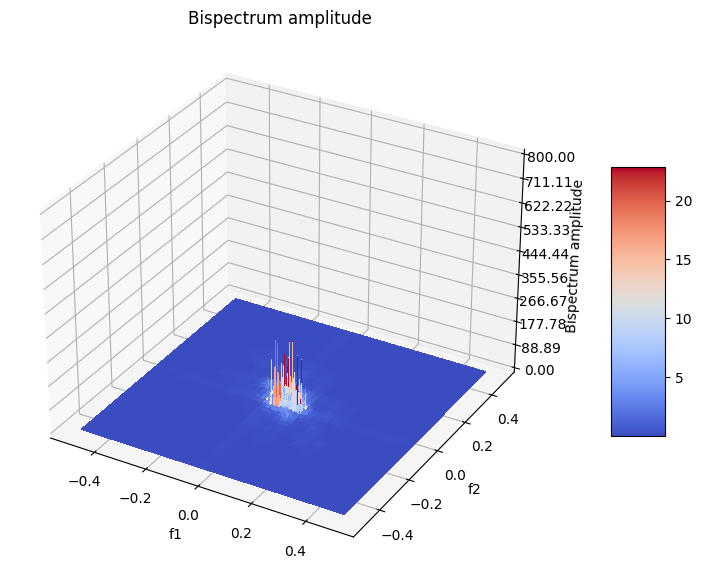

In [47]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,7))

# Make data.
X = bs_AN3_dmg.freq
Y = bs_AN3_dmg.freq
X, Y = np.meshgrid(bs_AN3_dmg.freq, bs_AN3_dmg.freq)
Z = bs_AN3_dmg.bispec_mag

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel('Bispectrum amplitude')
ax.set_title("Bispectrum amplitude")
ax.set_zlim(0,800)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

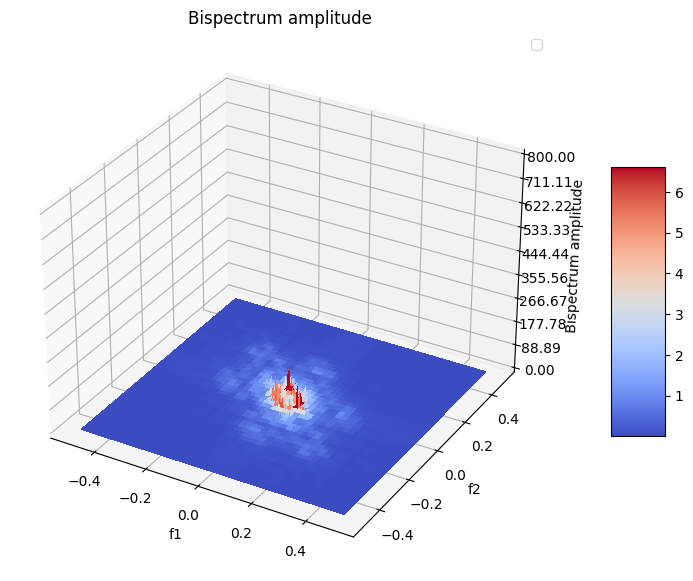

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,7))


# Make data.
X = bs_AN3_health.freq
Y = bs_AN3_health.freq
X, Y = np.meshgrid(bs_AN3_health.freq, bs_AN3_health.freq)
Z = bs_AN3_health.bispec_mag

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel('Bispectrum amplitude')
ax.set_title("Bispectrum amplitude")
ax.set_zlim(0,800)



# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend()

plt.show()

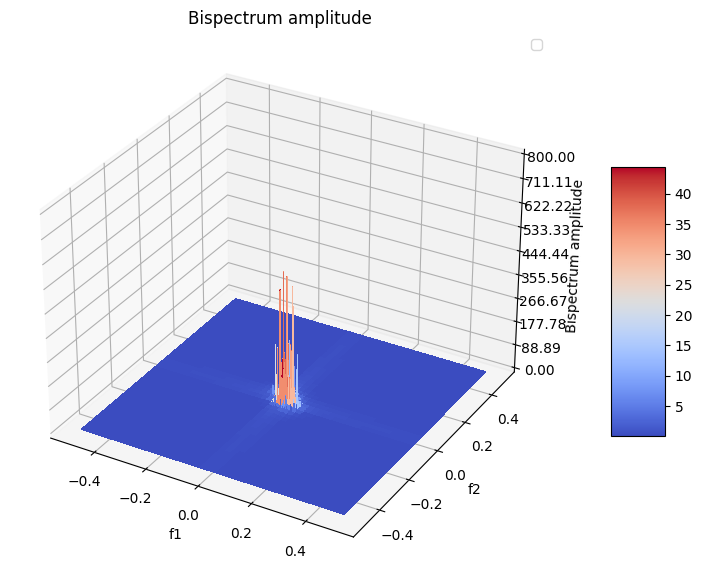

In [52]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,7))


# Make data.
X = bs_AN9_health.freq
Y = bs_AN9_health.freq
X, Y = np.meshgrid(bs_AN9_health.freq, bs_AN9_health.freq)
Z = bs_AN9_health.bispec_mag

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel('Bispectrum amplitude')
ax.set_title("Bispectrum amplitude")
ax.set_zlim(0,800)



# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend()

plt.show()

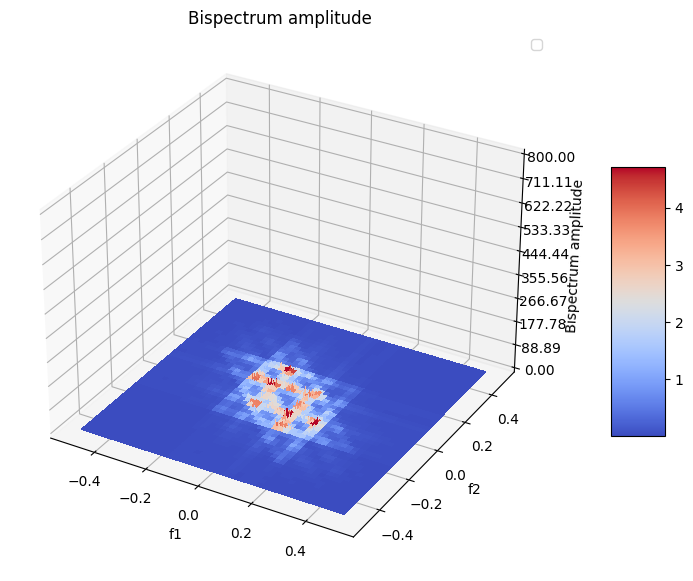

In [49]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,7))


# Make data.
X = bs_AN9_dmg.freq
Y = bs_AN9_dmg.freq
X, Y = np.meshgrid(bs_AN9_dmg.freq, bs_AN9_dmg.freq)
Z = bs_AN9_dmg.bispec_mag

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel('Bispectrum amplitude')
ax.set_title("Bispectrum amplitude")
ax.set_zlim(0,800)


# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend()

plt.show()

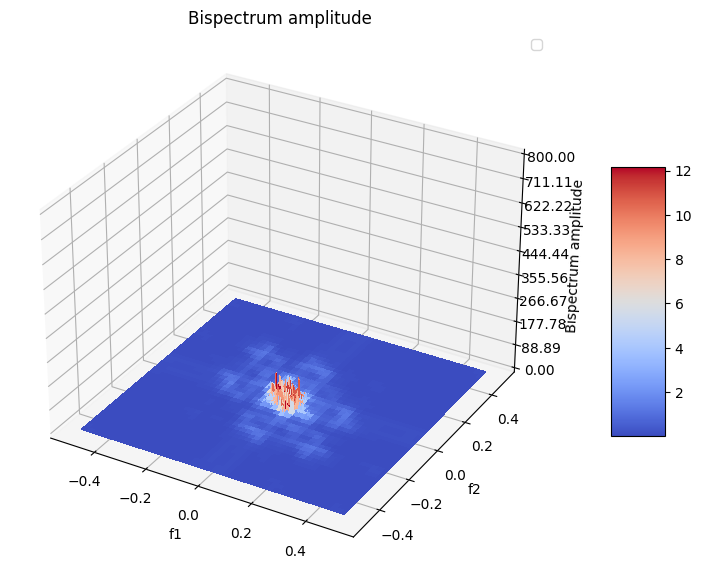

In [53]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,7))


# Make data.
X = bs_AN10_health.freq
Y = bs_AN10_health.freq
X, Y = np.meshgrid(bs_AN10_health.freq, bs_AN10_health.freq)
Z = bs_AN10_health.bispec_mag

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("f1")
ax.set_ylabel("f2")
ax.set_zlabel('Bispectrum amplitude')
ax.set_title("Bispectrum amplitude")
ax.set_zlim(0,800)



# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend()

plt.show()

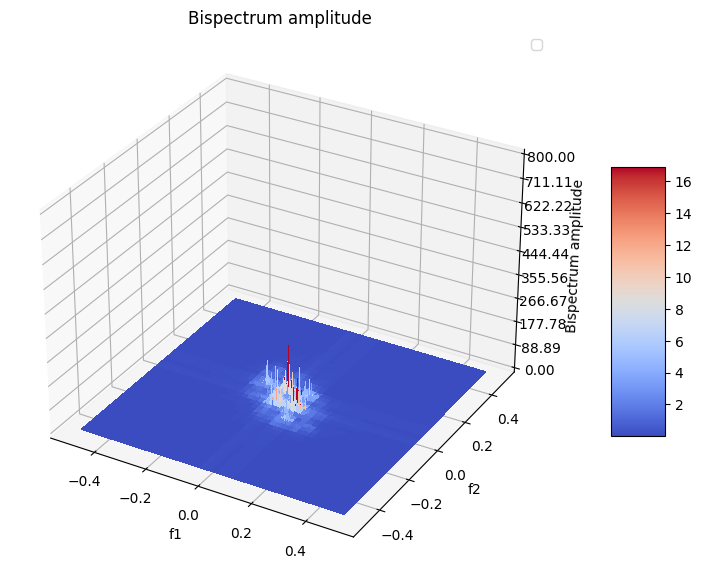

In [50]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,7))


# Make data.
X = bs_AN10_dmg.freq
Y = bs_AN10_dmg.freq
X, Y = np.meshgrid(bs_AN10_dmg.freq, bs_AN10_dmg.freq)
Z = bs_AN10_dmg.bispec_mag

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel("f1")
ax.set_ylabel("f2")
#ax.set_zlabel('Bispectrum amplitude')
ax.set_title("Bispectrum amplitude")
ax.set_zlim(0,800)



# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.legend()

plt.show()

In [42]:
range(1,9)

range(0, 8)

# Multiple subplot

Damage sensor:

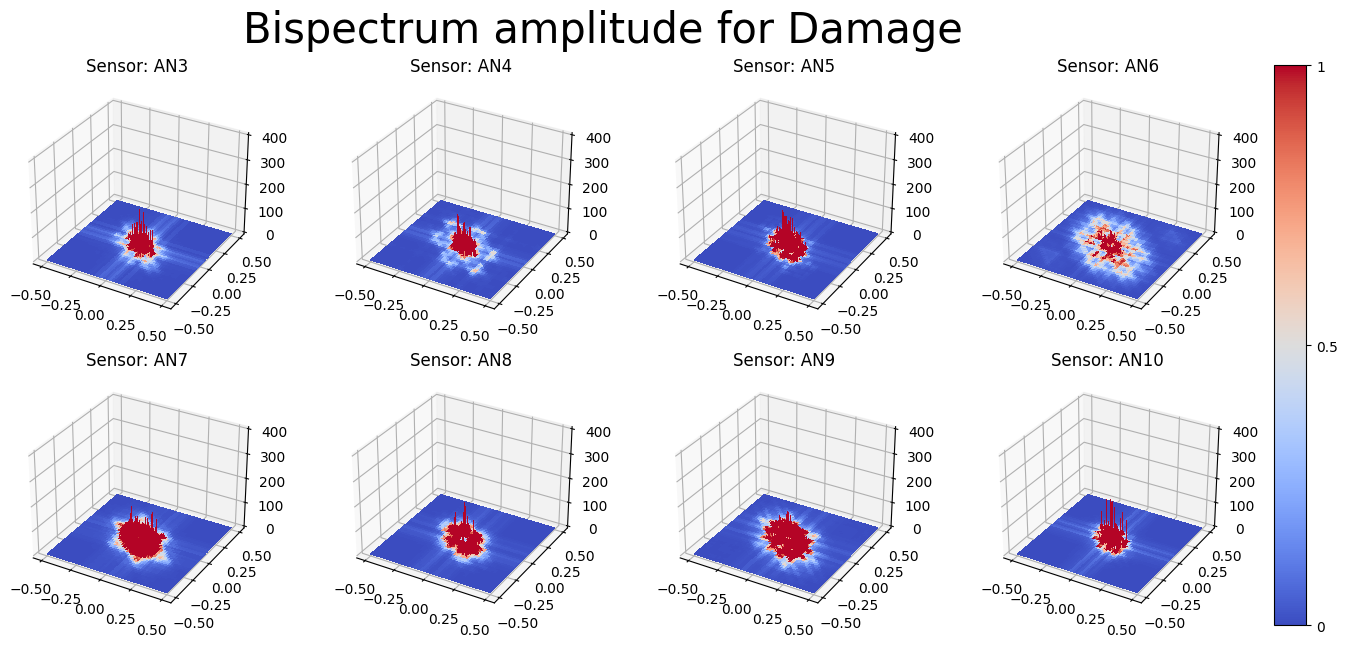

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator

bs_dmg = [bs_AN3_dmg,bs_AN4_dmg,bs_AN5_dmg,bs_AN6_dmg,bs_AN7_dmg,bs_AN8_dmg,bs_AN9_dmg,bs_AN10_dmg]
keys_sensor = ['AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10']
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(16,7))
fig.suptitle('Bispectrum amplitude for Damage',fontsize = 30)

for i in range(1,9):
    ax = fig.add_subplot(2, 4, i, projection='3d')
    # Make data.
    X = bs_dmg[i-1].freq
    Y = bs_dmg[i-1].freq
    X, Y = np.meshgrid(bs_dmg[i-1].freq, bs_dmg[i-1].freq)
    Z = bs_dmg[i-1].bispec_mag

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,vmin=0, vmax=1,
                        linewidth=0, antialiased=False)
    ax.set_zlim(0,400)
    ax.set_title("Sensor: {}".format(keys_sensor[i-1]))

cb_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(surf, cax=cb_ax)
cbar.set_ticks(np.arange(0, 1.1, 0.5))
cbar.set_ticklabels(['0', '0.5', '1'])
plt.show()

Health sensor:

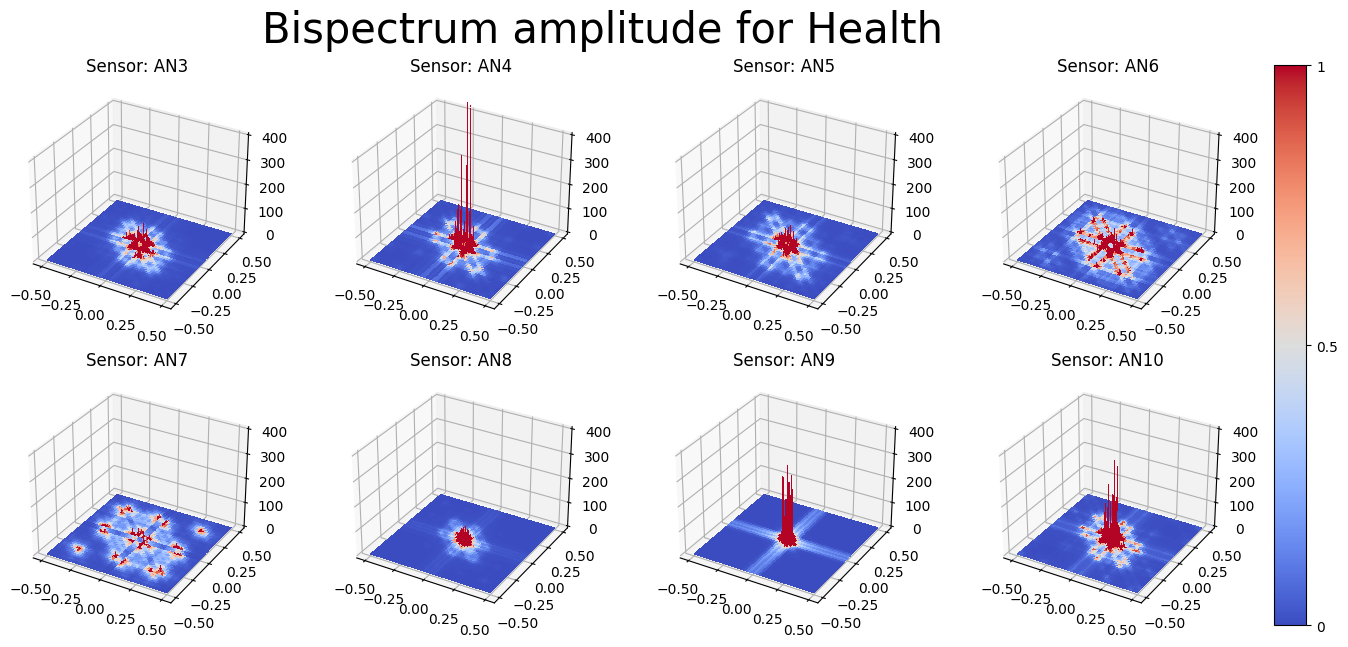

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator


bs_health = [bs_AN3_health,bs_AN4_health,bs_AN5_health,bs_AN6_health,bs_AN7_health,bs_AN8_health,bs_AN9_health,bs_AN10_health]
keys_sensor = ['AN3', 'AN4', 'AN5', 'AN6', 'AN7', 'AN8', 'AN9', 'AN10']
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(16,7))
fig.suptitle('Bispectrum amplitude for Health',fontsize = 30)

for i in range(1,9):
    ax = fig.add_subplot(2, 4, i, projection='3d')
    # Make data.
    X = bs_health[i-1].freq
    Y = bs_health[i-1].freq
    X, Y = np.meshgrid(bs_health[i-1].freq, bs_health[i-1].freq)
    Z = bs_health[i-1].bispec_mag

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,vmin=0, vmax=1,
                        linewidth=0, antialiased=False)
    ax.set_zlim(0,400)
    ax.set_title("Sensor: {}".format(keys_sensor[i-1]))

cb_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(surf, cax=cb_ax)
cbar.set_ticks(np.arange(0, 1.1, 0.5))
cbar.set_ticklabels(['0', '0.5', '1'])
plt.show()